<a href="https://colab.research.google.com/github/WinningHabits/lottery/blob/main/05_Machine_Learning_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('https://raw.githubusercontent.com/WinningHabits/lottery_dataset/main/lottery-toto_upto_08.23_revised_1.xlsx')


In [4]:
X = data.drop(columns=['Date by Month', 'Draw number 1', 'Draw number 2', 'Draw number 3', 'Draw number 4', 'Draw number 5', 'Draw number 6', 'Additional Number'])
y = data[['Draw number 1', 'Draw number 2', 'Draw number 3', 'Draw number 4', 'Draw number 5', 'Draw number 6', 'Additional Number']]


In [6]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
predictions_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, predictions_rf)
print(f"Random Forest MSE: {mse_rf}")


Random Forest MSE: 69.40803181104464


In [8]:
model_nn = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(y_train.shape[1])
])

model_nn.compile(optimizer='adam', loss='mse')
history = model_nn.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


Epoch 1/50
2/2 [==============================] - 1s 236ms/step - loss: 868.0021 - val_loss: 859.9603
Epoch 2/50
2/2 [==============================] - 0s 34ms/step - loss: 862.5535 - val_loss: 854.6713
Epoch 3/50
2/2 [==============================] - 0s 36ms/step - loss: 857.2375 - val_loss: 849.3904
Epoch 4/50
2/2 [==============================] - 0s 32ms/step - loss: 851.9915 - val_loss: 844.1503
Epoch 5/50
2/2 [==============================] - 0s 32ms/step - loss: 846.3800 - val_loss: 838.9591
Epoch 6/50
2/2 [==============================] - 0s 31ms/step - loss: 841.1783 - val_loss: 833.7640
Epoch 7/50
2/2 [==============================] - 0s 31ms/step - loss: 835.9104 - val_loss: 828.5667
Epoch 8/50
2/2 [==============================] - 0s 37ms/step - loss: 830.4068 - val_loss: 823.2255
Epoch 9/50
2/2 [==============================] - 0s 37ms/step - loss: 824.7921 - val_loss: 817.7728
Epoch 10/50
2/2 [==============================] - 0s 33ms/step - loss: 819.1406 - val_los

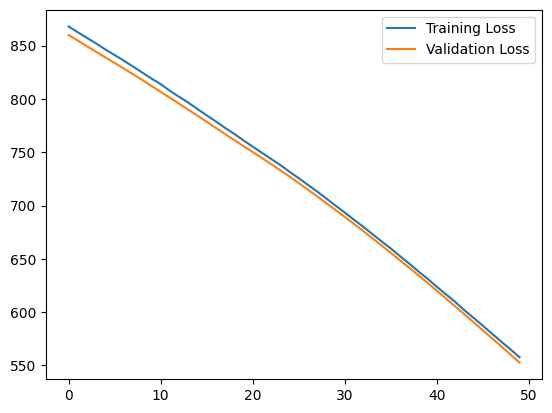

In [9]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [11]:
# Assuming your data is in the DataFrame `data` and you have split it into training and testing sets

# Let's try to predict if the number "1" will be drawn in the next draw
y_train_1 = y_train.apply(lambda x: 1 if 1 in x.values else 0, axis=1)
y_test_1 = y_test.apply(lambda x: 1 if 1 in x.values else 0, axis=1)

svm_classifier = SVC()
svm_classifier.fit(X_train, y_train_1)

y_pred = svm_classifier.predict(X_test)

print(classification_report(y_test_1, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



In [13]:
from sklearn.neighbors import KNeighborsClassifier

# Example for predicting "Draw number 1"
y_train_draw1 = y_train['Draw number 1']
y_test_draw1 = y_test['Draw number 1']

knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_classifier.fit(X_train, y_train_draw1)

y_pred_draw1 = knn_classifier.predict(X_test)

print(classification_report(y_test_draw1, y_pred_draw1))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.50      0.50      0.50         2
           3       0.50      1.00      0.67         1
           4       0.00      0.00      0.00         1
           5       0.25      0.50      0.33         2
           6       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         2

    accuracy                           0.23        13
   macro avg       0.10      0.17      0.12        13
weighted avg       0.15      0.23      0.18        13



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [14]:
from sklearn.neighbors import KNeighborsClassifier

# Example for predicting "Draw number 2"
y_train_draw1 = y_train['Draw number 2']
y_test_draw1 = y_test['Draw number 2']

knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_classifier.fit(X_train, y_train_draw1)

y_pred_draw1 = knn_classifier.predict(X_test)

print(classification_report(y_test_draw1, y_pred_draw1))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       0.0
           6       0.00      0.00      0.00       0.0
           8       0.00      0.00      0.00       2.0
           9       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       2.0
          13       0.00      0.00      0.00       1.0
          14       0.00      0.00      0.00       1.0
          15       0.00      0.00      0.00       1.0
          21       0.00      0.00      0.00       0.0
          22       0.00      0.00      0.00       3.0
          25       0.00      0.00      0.00       1.0
          26       0.00      0.00      0.00       1.0
          30       0.00      0.00      0.00       1.0

    accuracy                           0.00      13.0
   macro avg       0.00      0.00      0.00      13.0
weighted avg       0.00      0.00      0.00      13.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [15]:
from sklearn.neighbors import KNeighborsClassifier

# Example for predicting "Draw number 3"
y_train_draw1 = y_train['Draw number 3']
y_test_draw1 = y_test['Draw number 3']

knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_classifier.fit(X_train, y_train_draw1)

y_pred_draw1 = knn_classifier.predict(X_test)

print(classification_report(y_test_draw1, y_pred_draw1))


              precision    recall  f1-score   support

          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.25      1.00      0.40         1
          16       0.50      1.00      0.67         1
          18       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         0
          24       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         3
          31       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         0

    accuracy                           0.15        13
   macro avg       0.05      0.13      0.07        13
weighted avg       0.06   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [16]:
from sklearn.neighbors import KNeighborsClassifier

# Example for predicting "Draw number 4"
y_train_draw1 = y_train['Draw number 4']
y_test_draw1 = y_test['Draw number 4']

knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_classifier.fit(X_train, y_train_draw1)

y_pred_draw1 = knn_classifier.predict(X_test)

print(classification_report(y_test_draw1, y_pred_draw1))


              precision    recall  f1-score   support

          11       0.00      0.00      0.00       0.0
          18       0.00      0.00      0.00       0.0
          19       0.00      0.00      0.00       1.0
          20       0.00      0.00      0.00       0.0
          24       0.00      0.00      0.00       1.0
          25       0.00      0.00      0.00       0.0
          26       0.00      0.00      0.00       1.0
          28       0.00      0.00      0.00       1.0
          30       0.00      0.00      0.00       2.0
          31       0.00      0.00      0.00       1.0
          32       0.00      0.00      0.00       1.0
          33       0.00      0.00      0.00       3.0
          34       0.00      0.00      0.00       1.0
          39       0.00      0.00      0.00       1.0
          42       0.00      0.00      0.00       0.0

    accuracy                           0.00      13.0
   macro avg       0.00      0.00      0.00      13.0
weighted avg       0.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Example for predicting "Draw number 5"
y_train_draw1 = y_train['Draw number 5']
y_test_draw1 = y_test['Draw number 5']

knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_classifier.fit(X_train, y_train_draw1)

y_pred_draw1 = knn_classifier.predict(X_test)

print(classification_report(y_test_draw1, y_pred_draw1))


              precision    recall  f1-score   support

          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         0
          22       0.00      0.00      0.00         0
          23       0.00      0.00      0.00         0
          29       0.00      0.00      0.00         2
          31       0.00      0.00      0.00         0
          32       0.00      0.00      0.00         0
          34       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         1
          39       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         1
          42       0.00      0.00      0.00         2
          43       0.00      0.00      0.00         1
          45       0.50      1.00      0.67         1
          48       0.00      0.00      0.00         1

    accuracy                           0.08        13
   macro avg       0.03   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [18]:
from sklearn.neighbors import KNeighborsClassifier

# Example for predicting "Draw number 6"
y_train_draw1 = y_train['Draw number 6']
y_test_draw1 = y_test['Draw number 6']

knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_classifier.fit(X_train, y_train_draw1)

y_pred_draw1 = knn_classifier.predict(X_test)

print(classification_report(y_test_draw1, y_pred_draw1))


              precision    recall  f1-score   support

          22       0.00      0.00      0.00       0.0
          30       0.00      0.00      0.00       1.0
          34       0.00      0.00      0.00       0.0
          36       0.00      0.00      0.00       2.0
          38       0.00      0.00      0.00       0.0
          40       0.00      0.00      0.00       1.0
          41       0.00      0.00      0.00       1.0
          45       0.00      0.00      0.00       0.0
          46       0.00      0.00      0.00       1.0
          47       0.00      0.00      0.00       1.0
          48       0.00      0.00      0.00       2.0
          49       0.00      0.00      0.00       4.0

    accuracy                           0.00      13.0
   macro avg       0.00      0.00      0.00      13.0
weighted avg       0.00      0.00      0.00      13.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [19]:
# Predicting "Additional Number"
y_train_additional = y_train['Additional Number']
y_test_additional = y_test['Additional Number']

knn_classifier_additional = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors if needed
knn_classifier_additional.fit(X_train, y_train_additional)

y_pred_additional = knn_classifier_additional.predict(X_test)

print(classification_report(y_test_additional, y_pred_additional))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0
          12       0.50      1.00      0.67         1
          16       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         0
          46       0.00      0.00      0.00         1

    accuracy                           0.08        13
   macro avg       0.03   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.